In [ ]:
!unzip '/content/drive/MyDrive/data/Classification of Arrhythmia by Using Deep Learning with 2-D ECG Spectral Image Representation.zip'

##IMPORT THE LIBRARIES

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
train_data = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [ ]:
test_data = ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=train_data.flow_from_directory(r"/content/data/train",target_size=(64,64),
                                                            class_mode="categorical",batch_size=24)

Found 15341 images belonging to 6 classes.


In [ ]:
x_test = test_data.flow_from_directory('/content/data/test',
                                         target_size=(64,64),
                                         class_mode='categorical',
                                         batch_size=100)

Found 6825 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

##ADDING CNN AND DENSE LAYERS

In [ ]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten()) 
model.add(Dense(300,activation='relu')) 
model.add(Dense(150,activation='relu')) 
model.add(Dense(6, activation = 'softmax'))

## CONFIGURE THE LEARNING PROCESS

In [ ]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
len(x_train)


640

In [ ]:
len(x_test)

69

## TRAIN THE MODEL

In [ ]:
model.fit_generator(x_train,
                    steps_per_epoch=len(x_train),
                    epochs=10,
                    validation_data=x_train,
                    validation_steps=len(x_train))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


640/640 [==============================] - 54s 83ms/step - loss: 0.7426 - accuracy: 0.7647 - val_loss: 0.3360 - val_accuracy: 0.8926
Epoch 2/10
640/640 [==============================] - 52s 81ms/step - loss: 0.2833 - accuracy: 0.9124 - val_loss: 0.2911 - val_accuracy: 0.9103
Epoch 3/10
640/640 [==============================] - 52s 81ms/step - loss: 0.2031 - accuracy: 0.9381 - val_loss: 0.1589 - val_accuracy: 0.9509
Epoch 4/10
640/640 [==============================] - 52s 81ms/step - loss: 0.1650 - accuracy: 0.9493 - val_loss: 0.1549 - val_accuracy: 0.9521
Epoch 5/10
640/640 [==============================] - 52s 81ms/step - loss: 0.1741 - accuracy: 0.9482 - val_loss: 0.0989 - val_accuracy: 0.9707
Epoch 6/10
640/640 [==============================] - 55s 86ms/step - loss: 0.1058 - accuracy: 0.9681 - val_loss: 0.0879 - val_accuracy: 0.9741
Epoch 7/10
640/640 [==============================] - 51s 80ms/step - loss: 0.1238 - accuracy: 0.9632 - val_loss: 0.1471 - val_accuracy: 0.9519
Epo

## SAVE THE MODEL

In [ ]:
model.save('ECG.h5')

##TEST THE MODEL


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model("ECG.h5")

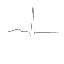

In [ ]:
img = image.load_img('/content/data/test/Normal/fig_2117.png',target_size=(64,64))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = model.predict(x)
pred

1/1 [==============================] - 0s 53ms/step


array([[0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
x_train.class_indices

{'Left Bundle Branch Block': 0,
 'Normal': 1,
 'Premature Atrial Contraction': 2,
 'Premature Ventricular Contractions': 3,
 'Right Bundle Branch Block': 4,
 'Ventricular Fibrillation': 5}

PREDICTION

In [ ]:
op = ['Left Bundle Branch Block','Normal','Premature Atrial Contraction','Premature Ventricular Contractions','Right Bundle Branch Block','Ventricular Fibrillation']
pred = np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 17ms/step


'Normal'

TESTING

In [ ]:
img1 = image.load_img('/content/data/test/Left Bundle Branch Block/fig_5901.png',target_size=(64,64))
x = image.img_to_array(img1)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 14ms/step


'Left Bundle Branch Block'

In [ ]:
img2 = image.load_img('/content/data/test/Ventricular Fibrillation/VFEfig_128.png',target_size=(64,64))
x = image.img_to_array(img2)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 16ms/step


'Ventricular Fibrillation'